# Data Cleaning

Our data was quite clean from the start. Our data exploration and cleaning process mainly consisted of removing years of data as well as Washington D.C. and the totals for USA when present in the energy consumption files.

# Initial Data File Cleaning

In [4]:
#Set dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [5]:
# sol_residential_df = pd.read_csv("Project-1/Resources/residential_solar_data.csv")
# sol_commercial_df = pd.read_csv("Project-1/Resources/commercial_solar_data.csv")
# sol_industrial_df = pd.read_csv("Project-1/Resources/industrial_solar_data.csv")
# co2_residential_df= pd.read_csv("Project-1/Resources/residential_c02.csv")
# c02_commercial_df = pd.read_csv("Project-1/Resources/commercial_c02.csv")
# co2_industrial_df = pd.read_csv("Project-1/Resources/industrial_c02.csv")
# residential_energy_df = pd.read_csv("Project-1/Resources/Residential_Energy_Consumption.csv")
# commercial_energy_df = pd.read_csv("Project-1/Resources/Commercial_Energy_Consumption.csv")
# industrial_energy_df = pd.read_csv("Project-1/Resources/Industrial_Energy_Consumption.csv")
sol_residential_df = pd.read_csv("residential_solar_data.csv")
sol_commercial_df = pd.read_csv("commercial_solar_data.csv")
sol_industrial_df = pd.read_csv("industrial_solar_data.csv")
co2_residential_df= pd.read_csv("residential_c02.csv")
c02_commercial_df = pd.read_csv("commercial_c02.csv")
co2_industrial_df = pd.read_csv("industrial_c02.csv")
residential_energy_df = pd.read_csv("Residential_Energy_Consumption.csv")
commercial_energy_df = pd.read_csv("Commercial_Energy_Consumption.csv")
industrial_energy_df = pd.read_csv("Industrial_Energy_Consumption.csv")
#Consumption data in billions BTUs

FileNotFoundError: [Errno 2] File residential_solar_data.csv does not exist: 'residential_solar_data.csv'

In [6]:
#sol_residential_df.info()
#sol_industrial_df.info()
#sol_commercial_df.info()
#co2_residential_df.info()
#c02_commercial_df.info()
#co2_industrial_df.info()
#residential_energy_df.info()
#commercial_energy_df.info()
industrial_energy_df.info()

NameError: name 'industrial_energy_df' is not defined

In [7]:
co2_residential_df
sol_residential_df
residential_energy_df

NameError: name 'co2_residential_df' is not defined

Solar energy: 2000-2018; 52 rows; dtype of each year column = int64; units of energy consumption are billion BTU. Data includes all 50 states, plus DC and USA. Columns are years in descending order.

CO2 emissions: 2000-2015; 50 rows; dtype of each year column = float64; units of emissions are million metric tons CO2. Data includes all 50 US states, columns are years in ascending order. "States" column = state abbreviations

Residential energy: 2000-2015; 52 rows; dtype of each year column = int64; units of energy consumption are billion BTU. Data includes all 50 states, plus DC and USA. Columns are years in descending order. "State" column = 'USA-abbr.'

In [8]:
sol_r_1=sol_residential_df[sol_residential_df.State != "USA-DC"]
sol_r_2 = sol_r_1[sol_r_1.State != "USA"]
cleaned_solar_res_df = sol_r_2.drop(columns = ["2018","2017","2016"])
cleaned_solar_res_df.to_csv("Project-1/Resources/cleaned_solar_residential.csv")

NameError: name 'sol_residential_df' is not defined

In [9]:
sol_c_1 = sol_commercial_df[sol_commercial_df.State != "USA-DC"]
sol_c_2 = sol_c_1[sol_c_1.State != "USA"]
cleaned_solar_com_df = sol_c_2.drop(columns = ["2018","2017","2016"])
cleaned_solar_com_df.to_csv("Project-1/Resources/cleaned_solar_commercial.csv")

NameError: name 'sol_commercial_df' is not defined

In [10]:
sol_i_1 = sol_industrial_df[sol_industrial_df.State != "USA-DC"]
sol_i_2 = sol_i_1[sol_i_1.State != "USA"]
cleaned_solar_ind_df = sol_i_2.drop(columns = ["2018","2017","2016"])
cleaned_solar_ind_df.to_csv("Project-1/Resources/cleaned_solar_industrial.csv")

NameError: name 'sol_industrial_df' is not defined

In [11]:
res_e_1 = residential_energy_df[residential_energy_df.State != "USA-DC"]
res_e_1 = res_e_1[res_e_1.State != "USA"]
res_e_1
#cleaned_solar_ind_df = sol_i_2.drop(columns = ["2018","2017","2016"])
res_e_1.to_csv("Project-1/Resources/cleaned_Residential_Energy.csv")

NameError: name 'residential_energy_df' is not defined

In [12]:
com_e_1 = commercial_energy_df[commercial_energy_df.State != "USA-DC"]
com_e_1 = com_e_1[com_e_1.State != "USA"]
#com_e_1
cleaned_com_e_df = com_e_1.drop(columns = ["2018","2017","2016"])
cleaned_com_e_df.to_csv("Project-1/Resources/cleaned_Commercial_Energy.csv")

NameError: name 'commercial_energy_df' is not defined

In [13]:
ind_e_1 = industrial_energy_df[industrial_energy_df.State != "USA-DC"]
ind_e_2 = ind_e_1[ind_e_1.State != "USA"]
#ind_e_2
cleaned_ind_e_df = ind_e_2.drop(columns = ["2018","2017","2016"])
cleaned_ind_e_df.to_csv("Project-1/Resources/cleaned_Industrial_Energy.csv")

NameError: name 'industrial_energy_df' is not defined

# Commercial and Industrial State Data Clean Up

Commercial Energy Consumption Data Exploration

In [14]:
#Commercial Total Energy Consumed
com_series_stateids =["SEDS.TECCB.AL.A", "SEDS.TECCB.AK.A", "SEDS.TECCB.AZ.A", "SEDS.TECCB.AR.A", "SEDS.TECCB.CA.A", 
                      "SEDS.TECCB.CO.A", "SEDS.TECCB.CT.A", "SEDS.TECCB.DC.A", "SEDS.TECCB.DE.A", "SEDS.TECCB.FL.A", 
                      "SEDS.TECCB.GA.A", "SEDS.TECCB.HI.A", "SEDS.TECCB.ID.A", "SEDS.TECCB.IL.A", "SEDS.TECCB.IN.A", 
                      "SEDS.TECCB.IA.A", "SEDS.TECCB.KS.A", "SEDS.TECCB.KY.A", "SEDS.TECCB.LA.A", "SEDS.TECCB.ME.A", 
                      "SEDS.TECCB.MD.A", "SEDS.TECCB.MA.A", "SEDS.TECCB.MI.A", "SEDS.TECCB.MN.A", "SEDS.TECCB.MS.A", 
                      "SEDS.TECCB.MO.A", "SEDS.TECCB.MT.A", "SEDS.TECCB.NE.A", "SEDS.TECCB.NV.A", "SEDS.TECCB.NH.A", 
                      "SEDS.TECCB.NJ.A", "SEDS.TECCB.NM.A", "SEDS.TECCB.NY.A", "SEDS.TECCB.NC.A", "SEDS.TECCB.ND.A", 
                      "SEDS.TECCB.OH.A", "SEDS.TECCB.OK.A", "SEDS.TECCB.OR.A", "SEDS.TECCB.PA.A", "SEDS.TECCB.RI.A", 
                      "SEDS.TECCB.SC.A", "SEDS.TECCB.SD.A", "SEDS.TECCB.TN.A", "SEDS.TECCB.TX.A", "SEDS.TECCB.UT.A", 
                      "SEDS.TECCB.VT.A", "SEDS.TECCB.VA.A", "SEDS.TECCB.WA.A", "SEDS.TECCB.WV.A", "SEDS.TECCB.WI.A", 
                      "SEDS.TECCB.WY.A", "SEDS.TECCB.US.A"]

In [15]:
api_key = '6137f2c566df03b61653f96b7dc5d69d'

In [16]:
energy_consumption = {}
state_name = []
year = []
consumption = []

In [17]:
for row in com_series_stateids:
    url = "http://api.eia.gov/series/?"
    query_url = url + "api_key=" + api_key + "&series_id="
#     year=[]
#     energy_consumed = []
    response = requests.get(query_url + row).json()['series'][0]['data'][3:19]
    name_response = requests.get(query_url + row).json()['series'][0]['geography']
        
    for item in response:
        state_name.append(name_response)
        year.append(item[0])
        consumption.append(item[1])
        
    print(response)
    print(name_response)

[['2015', 263457], ['2014', 262497], ['2013', 256750], ['2012', 244919], ['2011', 257067], ['2010', 270504], ['2009', 257060], ['2008', 271267], ['2007', 276430], ['2006', 268294], ['2005', 260757], ['2004', 257993], ['2003', 249280], ['2002', 250226], ['2001', 243613], ['2000', 250773]]
USA-AL
[['2015', 66983], ['2014', 63219], ['2013', 62922], ['2012', 69598], ['2011', 70816], ['2010', 66822], ['2009', 61825], ['2008', 64441], ['2007', 63076], ['2006', 67572], ['2005', 62403], ['2004', 63451], ['2003', 58567], ['2002', 60184], ['2001', 66274], ['2000', 69873]]
USA-AK
[['2015', 347477], ['2014', 342287], ['2013', 349984], ['2012', 343783], ['2011', 347514], ['2010', 333894], ['2009', 332909], ['2008', 342185], ['2007', 341414], ['2006', 333127], ['2005', 322978], ['2004', 313878], ['2003', 310692], ['2002', 311230], ['2001', 312480], ['2000', 314579]]
USA-AZ
[['2015', 179155], ['2014', 182202], ['2013', 176523], ['2012', 170147], ['2011', 174604], ['2010', 174500], ['2009', 164583], [

[['2015', 124431], ['2014', 120758], ['2013', 121677], ['2012', 118128], ['2011', 119870], ['2010', 117553], ['2009', 115460], ['2008', 122539], ['2007', 124368], ['2006', 126244], ['2005', 120281], ['2004', 119144], ['2003', 116777], ['2002', 114184], ['2001', 109386], ['2000', 110213]]
USA-NV
[['2015', 72019], ['2014', 71056], ['2013', 69952], ['2012', 66272], ['2011', 66407], ['2010', 66146], ['2009', 67673], ['2008', 68326], ['2007', 69762], ['2006', 68970], ['2005', 76208], ['2004', 73636], ['2003', 72415], ['2002', 68997], ['2001', 66199], ['2000', 65847]]
USA-NH
[['2015', 596251], ['2014', 631418], ['2013', 607669], ['2012', 607156], ['2011', 635590], ['2010', 632896], ['2009', 633627], ['2008', 639790], ['2007', 652547], ['2006', 621617], ['2005', 654297], ['2004', 638074], ['2003', 610226], ['2002', 581672], ['2001', 557204], ['2000', 581258]]
USA-NJ
[['2015', 125176], ['2014', 125903], ['2013', 126204], ['2012', 125840], ['2011', 126817], ['2010', 123544], ['2009', 120498], [

In [18]:
com_df_info = pd.DataFrame({"State" : state_name, "Year" : year, "Consumption" : consumption})
com_df_info.head()

,State,Year,Consumption
0,USA-AL,2015,263457
1,USA-AL,2014,262497
2,USA-AL,2013,256750
3,USA-AL,2012,244919
4,USA-AL,2011,257067


In [19]:
state = com_df_info["State"].unique()
y2015 = com_df_info.loc[com_df_info["Year"] == "2015",:]   
y2015_data = y2015["Consumption"].values

y2014 = com_df_info.loc[com_df_info["Year"] == "2014",:]   
y2014_data = y2014["Consumption"].values

y2013 = com_df_info.loc[com_df_info["Year"] == "2013",:]   
y2013_data = y2013["Consumption"].values

y2012 = com_df_info.loc[com_df_info["Year"] == "2012",:]   
y2012_data = y2012["Consumption"].values

y2011 = com_df_info.loc[com_df_info["Year"] == "2011",:]   
y2011_data = y2011["Consumption"].values

y2010 = com_df_info.loc[com_df_info["Year"] == "2010",:]   
y2010_data = y2010["Consumption"].values

y2009 = com_df_info.loc[com_df_info["Year"] == "2009",:]   
y2009_data = y2009["Consumption"].values

y2008 = com_df_info.loc[com_df_info["Year"] == "2008",:]   
y2008_data = y2008["Consumption"].values

y2007 = com_df_info.loc[com_df_info["Year"] == "2007",:]   
y2007_data = y2007["Consumption"].values

y2006 = com_df_info.loc[com_df_info["Year"] == "2006",:]   
y2006_data = y2006["Consumption"].values

y2005 = com_df_info.loc[com_df_info["Year"] == "2005",:]   
y2005_data = y2005["Consumption"].values

y2004 = com_df_info.loc[com_df_info["Year"] == "2004",:]   
y2004_data = y2004["Consumption"].values

y2003 = com_df_info.loc[com_df_info["Year"] == "2003",:]   
y2003_data = y2003["Consumption"].values

y2002 = com_df_info.loc[com_df_info["Year"] == "2002",:]   
y2002_data = y2002["Consumption"].values

y2001 = com_df_info.loc[com_df_info["Year"] == "2001",:]   
y2001_data = y2001["Consumption"].values

y2000 = com_df_info.loc[com_df_info["Year"] == "2000",:]   
y2000_data = y2000["Consumption"].values

In [20]:
com_consumption_df = pd.DataFrame({"State":state, "2015":y2015_data, "2014":y2014_data, "2013":y2013_data, "2012":y2012_data,
                                   "2011":y2011_data, "2010":y2010_data, "2009":y2009_data, "2008":y2008_data, "2007":y2007_data,
                                   "2006":y2006_data, "2005":y2005_data, "2004":y2004_data, "2003":y2003_data, "2002":y2002_data,
                                   "2001":y2001_data, "2000":y2000_data})
com_consumption_df.head()

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,USA-AL,263457,262497,256750,244919,257067,270504,257060,271267,276430,268294,260757,257993,249280,250226,243613,250773
1,USA-AK,66983,63219,62922,69598,70816,66822,61825,64441,63076,67572,62403,63451,58567,60184,66274,69873
2,USA-AZ,347477,342287,349984,343783,347514,333894,332909,342185,341414,333127,322978,313878,310692,311230,312480,314579
3,USA-AR,179155,182202,176523,170147,174604,174500,164583,166933,162806,158434,163193,153539,153730,151491,150150,146310
4,USA-CA,1462756,1432703,1430427,1488960,1538314,1510438,1514229,1572133,1536055,1521164,1484593,1535683,1422511,1453641,1443700,1354275


In [21]:
com_consumption_df = com_consumption_df.set_index('State')
com_consumption_df['SubTotal'] = (com_consumption_df['2015'] + com_consumption_df['2014'] + com_consumption_df['2013'] + 
                               com_consumption_df['2012'] + com_consumption_df['2011'] + com_consumption_df['2010'] +
                               com_consumption_df['2009'] + com_consumption_df['2008'] + com_consumption_df['2007'] +
                               com_consumption_df['2006'] + com_consumption_df['2005'] + com_consumption_df['2004'] +
                               com_consumption_df['2003'] + com_consumption_df['2002'] + com_consumption_df['2001'] +
                               com_consumption_df['2000'])

com_consumption_df.head()

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,SubTotal
State,,,,,,,,,,,,,,,,,
USA-AL,263457,262497,256750,244919,257067,270504,257060,271267,276430,268294,260757,257993,249280,250226,243613,250773,4140887
USA-AK,66983,63219,62922,69598,70816,66822,61825,64441,63076,67572,62403,63451,58567,60184,66274,69873,1038026
USA-AZ,347477,342287,349984,343783,347514,333894,332909,342185,341414,333127,322978,313878,310692,311230,312480,314579,5300411
USA-AR,179155,182202,176523,170147,174604,174500,164583,166933,162806,158434,163193,153539,153730,151491,150150,146310,2628300
USA-CA,1462756,1432703,1430427,1488960,1538314,1510438,1514229,1572133,1536055,1521164,1484593,1535683,1422511,1453641,1443700,1354275,23701582


In [22]:
com_consumption_df.to_csv("Commercial_Energy_Consumption.csv")

Industrial Energy Consumption Data Exploration

In [23]:
#Industrial Total Energy Consumed
ind_series_stateids =["SEDS.TEICB.AL.A", "SEDS.TEICB.AK.A", "SEDS.TEICB.AZ.A", "SEDS.TEICB.AR.A", "SEDS.TEICB.CA.A", 
                      "SEDS.TEICB.CO.A", "SEDS.TEICB.CT.A", "SEDS.TEICB.DC.A", "SEDS.TEICB.DE.A", "SEDS.TEICB.FL.A", 
                      "SEDS.TEICB.GA.A", "SEDS.TEICB.HI.A", "SEDS.TEICB.ID.A", "SEDS.TEICB.IL.A", "SEDS.TEICB.IN.A", 
                      "SEDS.TEICB.IA.A", "SEDS.TEICB.KS.A", "SEDS.TEICB.KY.A", "SEDS.TEICB.LA.A", "SEDS.TEICB.ME.A", 
                      "SEDS.TEICB.MD.A", "SEDS.TEICB.MA.A", "SEDS.TEICB.MI.A", "SEDS.TEICB.MN.A", "SEDS.TEICB.MS.A", 
                      "SEDS.TEICB.MO.A", "SEDS.TEICB.MT.A", "SEDS.TEICB.NE.A", "SEDS.TEICB.NV.A", "SEDS.TEICB.NH.A", 
                      "SEDS.TEICB.NJ.A", "SEDS.TEICB.NM.A", "SEDS.TEICB.NY.A", "SEDS.TEICB.NC.A", "SEDS.TEICB.ND.A", 
                      "SEDS.TEICB.OH.A", "SEDS.TEICB.OK.A", "SEDS.TEICB.OR.A", "SEDS.TEICB.PA.A", "SEDS.TEICB.RI.A", 
                      "SEDS.TEICB.SC.A", "SEDS.TEICB.SD.A", "SEDS.TEICB.TN.A", "SEDS.TEICB.TX.A", "SEDS.TEICB.UT.A", 
                      "SEDS.TEICB.VT.A", "SEDS.TEICB.VA.A", "SEDS.TEICB.WA.A", "SEDS.TEICB.WV.A", "SEDS.TEICB.WI.A", 
                      "SEDS.TEICB.WY.A", "SEDS.TEICB.US.A"]

In [24]:
energy_consumption = {}
state_name = []
year = []
consumption = []

In [25]:
for row in ind_series_stateids:
    url = "http://api.eia.gov/series/?"
    query_url = url + "api_key=" + api_key + "&series_id="
#     year=[]
#     energy_consumed = []
    response = requests.get(query_url + row).json()['series'][0]['data'][3:19]
    name_response = requests.get(query_url + row).json()['series'][0]['geography']
        
    for item in response:
        state_name.append(name_response)
        year.append(item[0])
        consumption.append(item[1])
        
    print(response)
    print(name_response)

[['2015', 823765], ['2014', 861143], ['2013', 850439], ['2012', 835514], ['2011', 804046], ['2010', 774098], ['2009', 711199], ['2008', 876097], ['2007', 915657], ['2006', 933217], ['2005', 930987], ['2004', 941966], ['2003', 877629], ['2002', 857704], ['2001', 849465], ['2000', 990428]]
USA-AL
[['2015', 331209], ['2014', 330421], ['2013', 334286], ['2012', 339183], ['2011', 331420], ['2010', 326937], ['2009', 334430], ['2008', 317535], ['2007', 356533], ['2006', 353673], ['2005', 418115], ['2004', 389872], ['2003', 402842], ['2002', 411348], ['2001', 409960], ['2000', 401675]]
USA-AK
[['2015', 236211], ['2014', 236530], ['2013', 213634], ['2012', 220120], ['2011', 224978], ['2010', 208272], ['2009', 197015], ['2008', 232755], ['2007', 221076], ['2006', 226196], ['2005', 220120], ['2004', 224216], ['2003', 198138], ['2002', 204137], ['2001', 213987], ['2000', 225886]]
USA-AZ
[['2015', 377764], ['2014', 412848], ['2013', 412235], ['2012', 405144], ['2011', 421820], ['2010', 410689], ['2

[['2015', 164315], ['2014', 182936], ['2013', 170555], ['2012', 166621], ['2011', 164970], ['2010', 173174], ['2009', 171169], ['2008', 182066], ['2007', 186774], ['2006', 197213], ['2005', 189095], ['2004', 181718], ['2003', 169033], ['2002', 161019], ['2001', 171342], ['2000', 167933]]
USA-NV
[['2015', 41806], ['2014', 43179], ['2013', 42820], ['2012', 40058], ['2011', 40228], ['2010', 39217], ['2009', 36822], ['2008', 42240], ['2007', 43603], ['2006', 46242], ['2005', 51690], ['2004', 54173], ['2003', 52118], ['2002', 47723], ['2001', 53319], ['2000', 57848]]
USA-NH
[['2015', 262799], ['2014', 259397], ['2013', 271076], ['2012', 274978], ['2011', 276945], ['2010', 271319], ['2009', 263184], ['2008', 316726], ['2007', 366890], ['2006', 365106], ['2005', 390565], ['2004', 386626], ['2003', 396163], ['2002', 425522], ['2001', 442134], ['2000', 411502]]
USA-NJ
[['2015', 226406], ['2014', 230243], ['2013', 220821], ['2012', 226028], ['2011', 223188], ['2010', 214491], ['2009', 210928], [

In [26]:
ind_df_info = pd.DataFrame({"State" : state_name, "Year" : year, "Consumption" : consumption})
ind_df_info.head()

,State,Year,Consumption
0,USA-AL,2015,823765
1,USA-AL,2014,861143
2,USA-AL,2013,850439
3,USA-AL,2012,835514
4,USA-AL,2011,804046


In [27]:
state = ind_df_info["State"].unique()
y2015 = ind_df_info.loc[ind_df_info["Year"] == "2015",:]   
y2015_data = y2015["Consumption"].values

y2014 = ind_df_info.loc[ind_df_info["Year"] == "2014",:]   
y2014_data = y2014["Consumption"].values

y2013 = ind_df_info.loc[ind_df_info["Year"] == "2013",:]   
y2013_data = y2013["Consumption"].values

y2012 = ind_df_info.loc[ind_df_info["Year"] == "2012",:]   
y2012_data = y2012["Consumption"].values

y2011 = ind_df_info.loc[ind_df_info["Year"] == "2011",:]   
y2011_data = y2011["Consumption"].values

y2010 = ind_df_info.loc[ind_df_info["Year"] == "2010",:]   
y2010_data = y2010["Consumption"].values

y2009 = ind_df_info.loc[ind_df_info["Year"] == "2009",:]   
y2009_data = y2009["Consumption"].values

y2008 = ind_df_info.loc[ind_df_info["Year"] == "2008",:]   
y2008_data = y2008["Consumption"].values

y2007 = ind_df_info.loc[ind_df_info["Year"] == "2007",:]   
y2007_data = y2007["Consumption"].values

y2006 = ind_df_info.loc[ind_df_info["Year"] == "2006",:]   
y2006_data = y2006["Consumption"].values

y2005 = ind_df_info.loc[ind_df_info["Year"] == "2005",:]   
y2005_data = y2005["Consumption"].values

y2004 = ind_df_info.loc[ind_df_info["Year"] == "2004",:]   
y2004_data = y2004["Consumption"].values

y2003 = ind_df_info.loc[ind_df_info["Year"] == "2003",:]   
y2003_data = y2003["Consumption"].values

y2002 = ind_df_info.loc[ind_df_info["Year"] == "2002",:]   
y2002_data = y2002["Consumption"].values

y2001 = ind_df_info.loc[ind_df_info["Year"] == "2001",:]   
y2001_data = y2001["Consumption"].values

y2000 = ind_df_info.loc[ind_df_info["Year"] == "2000",:]   
y2000_data = y2000["Consumption"].values

In [28]:
ind_consumption_df = pd.DataFrame({"State":state, "2015":y2015_data, "2014":y2014_data, "2013":y2013_data, "2012":y2012_data,
                                   "2011":y2011_data, "2010":y2010_data, "2009":y2009_data, "2008":y2008_data, "2007":y2007_data,
                                   "2006":y2006_data, "2005":y2005_data, "2004":y2004_data, "2003":y2003_data, "2002":y2002_data,
                                   "2001":y2001_data, "2000":y2000_data})
ind_consumption_df.head()

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,USA-AL,823765,861143,850439,835514,804046,774098,711199,876097,915657,933217,930987,941966,877629,857704,849465,990428
1,USA-AK,331209,330421,334286,339183,331420,326937,334430,317535,356533,353673,418115,389872,402842,411348,409960,401675
2,USA-AZ,236211,236530,213634,220120,224978,208272,197015,232755,221076,226196,220120,224216,198138,204137,213987,225886
3,USA-AR,377764,412848,412235,405144,421820,410689,365081,421531,440996,441382,431591,435855,444429,456906,447636,476543
4,USA-CA,1849780,1859203,1884895,1747060,1784583,1740127,1713404,1846322,1894789,1908391,1937656,1997588,1928700,1953103,2089449,2094271


In [29]:
ind_consumption_df = ind_consumption_df.set_index("State")
ind_consumption_df['SubTotal'] = (ind_consumption_df['2015'] + ind_consumption_df['2014'] + ind_consumption_df['2013'] + 
                               ind_consumption_df['2012'] + ind_consumption_df['2011'] + ind_consumption_df['2010'] +
                               ind_consumption_df['2009'] + ind_consumption_df['2008'] + ind_consumption_df['2007'] +
                               ind_consumption_df['2006'] + ind_consumption_df['2005'] + ind_consumption_df['2004'] +
                               ind_consumption_df['2003'] + ind_consumption_df['2002'] + ind_consumption_df['2001'] +
                               ind_consumption_df['2000'])
ind_consumption_df

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,SubTotal
State,,,,,,,,,,,,,,,,,
USA-AL,823765,861143,850439,835514,804046,774098,711199,876097,915657,933217,930987,941966,877629,857704,849465,990428,13833354
USA-AK,331209,330421,334286,339183,331420,326937,334430,317535,356533,353673,418115,389872,402842,411348,409960,401675,5789439
USA-AZ,236211,236530,213634,220120,224978,208272,197015,232755,221076,226196,220120,224216,198138,204137,213987,225886,3503271
USA-AR,377764,412848,412235,405144,421820,410689,365081,421531,440996,441382,431591,435855,444429,456906,447636,476543,6802450
USA-CA,1849780,1859203,1884895,1747060,1784583,1740127,1713404,1846322,1894789,1908391,1937656,1997588,1928700,1953103,2089449,2094271,30229321
USA-CO,440348,431776,415087,421180,421232,455480,414088,412273,405162,396319,387747,376686,371668,356356,378721,312254,6396377
USA-CT,78393,85921,88143,83352,86015,88602,87157,81049,107395,111351,118448,116461,122066,107708,114029,124719,1600809
USA-DC,6958,7260,7151,7014,6816,7275,7139,3645,4197,3821,4020,4516,4763,4514,4441,3906,87436
USA-DE,89074,87476,90725,92276,85081,50473,58909,90123,90639,92197,97921,95307,109899,113831,113066,112954,1469951


In [30]:
ind_consumption_df.to_csv("Industrial_Energy_Consumption.csv")

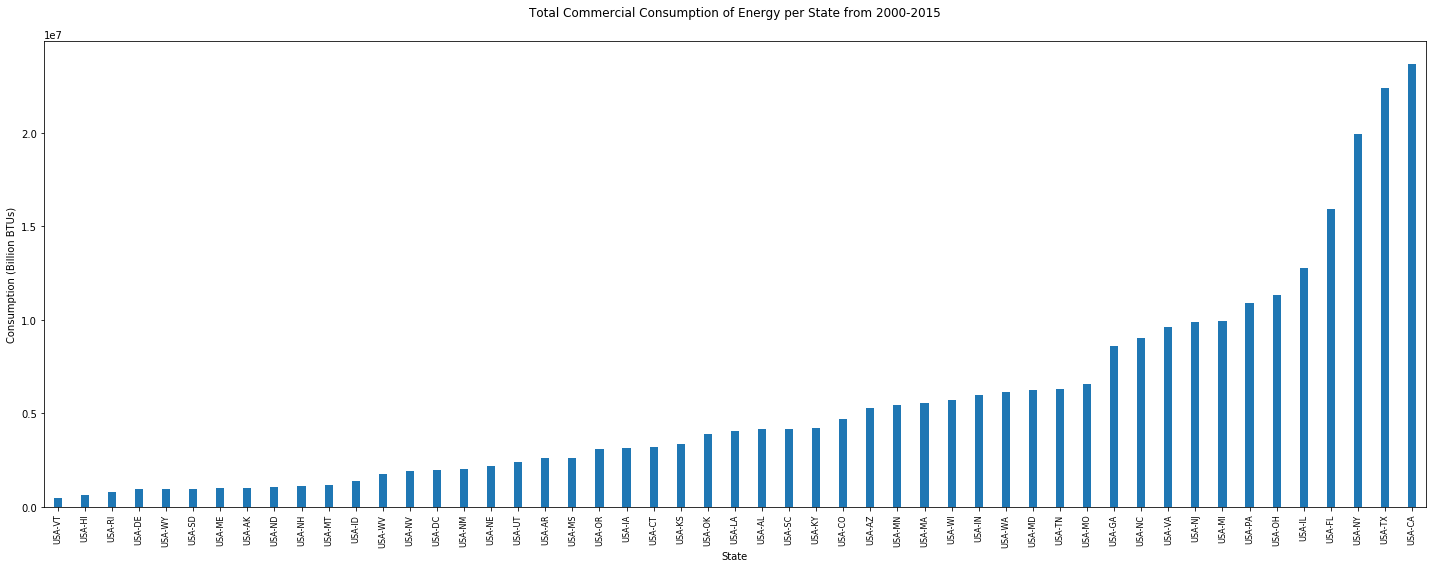

In [31]:
com_df = com_consumption_df.drop(['USA'])
com_df = com_df.sort_values('SubTotal')

totals = com_df["SubTotal"]
states = com_df.index.values
ttl = "Total Commercial Consumption of Energy per State from 2000-2015"

x = states
y = totals.values
x_position = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49,50]

plt.figure(figsize=(20,8))
plt.bar(x, y, width=0.3, align="center")
plt.title(ttl, pad=25)
plt.xlabel("State")
plt.ylabel("Consumption (Billion BTUs)")
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', labelsize=8)
plt.xlim(-0.5, (len(x) - 0.5))
plt.tight_layout()
plt.show()

# Residential State Data Clean Up

In [32]:
#List all series IDs for states including USA
series_stateids =[ "SEDS.TERCB.AL.A","SEDS.TERCB.AK.A", "SEDS.TERCB.AZ.A", "SEDS.TERCB.AR.A", "SEDS.TERCB.CA.A", "SEDS.TERCB.CO.A", "SEDS.TERCB.CT.A", "SEDS.TERCB.DC.A", "SEDS.TERCB.DE.A", "SEDS.TERCB.FL.A", "SEDS.TERCB.GA.A", "SEDS.TERCB.HI.A", "SEDS.TERCB.ID.A", "SEDS.TERCB.IL.A", "SEDS.TERCB.IN.A", "SEDS.TERCB.IA.A", "SEDS.TERCB.KS.A", "SEDS.TERCB.KY.A", "SEDS.TERCB.LA.A", "SEDS.TERCB.ME.A", "SEDS.TERCB.MD.A", "SEDS.TERCB.MA.A", "SEDS.TERCB.MI.A", "SEDS.TERCB.MN.A", "SEDS.TERCB.MS.A", "SEDS.TERCB.MO.A", "SEDS.TERCB.MT.A", "SEDS.TERCB.NE.A", "SEDS.TERCB.NV.A", "SEDS.TERCB.NH.A", "SEDS.TERCB.NJ.A", "SEDS.TERCB.NM.A", "SEDS.TERCB.NY.A", "SEDS.TERCB.NC.A", "SEDS.TERCB.ND.A", "SEDS.TERCB.OH.A", "SEDS.TERCB.OK.A", "SEDS.TERCB.OR.A", "SEDS.TERCB.PA.A", "SEDS.TERCB.RI.A", "SEDS.TERCB.SC.A", "SEDS.TERCB.SD.A", "SEDS.TERCB.TN.A", "SEDS.TERCB.TX.A", "SEDS.TERCB.UT.A", "SEDS.TERCB.VT.A", "SEDS.TERCB.VA.A", "SEDS.TERCB.WA.A", "SEDS.TERCB.WV.A", "SEDS.TERCB.WI.A", "SEDS.TERCB.WY.A", "SEDS.TERCB.US.A"]

In [33]:
#Set EIA API Key
api_key = '6137f2c566df03b61653f96b7dc5d69d'

In [34]:
#Create dictionary and lists to hold information
energy_consumption = {}
state_name = []
year = []
consumption = []

In [35]:
#Loop through each state data and save data
for row in series_stateids:
    url = "http://api.eia.gov/series/?"
    query_url = url + "api_key=" + api_key + "&series_id="
#     year=[]
#     energy_consumed = []
    response = requests.get(query_url + row).json()['series'][0]['data'][3:19]
    name_response = requests.get(query_url + row).json()['series'][0]['geography']
        
    for item in response:
        state_name.append(name_response)
        year.append(item[0])
        consumption.append(item[1])
        
    print(response)
    print(name_response)

[['2015', 349230], ['2014', 378853], ['2013', 358238], ['2012', 338290], ['2011', 377607], ['2010', 419277], ['2009', 372781], ['2008', 388024], ['2007', 394481], ['2006', 386066], ['2005', 384310], ['2004', 372753], ['2003', 367777], ['2002', 379696], ['2001', 360336], ['2000', 380174]]
USA-AL
[['2015', 53136], ['2014', 47823], ['2013', 48810], ['2012', 54597], ['2011', 53939], ['2010', 52253], ['2009', 53536], ['2008', 53668], ['2007', 53742], ['2006', 59556], ['2005', 53524], ['2004', 55874], ['2003', 52810], ['2002', 52028], ['2001', 54045], ['2000', 50780]]
USA-AK
[['2015', 385477], ['2014', 377963], ['2013', 389450], ['2012', 378865], ['2011', 391384], ['2010', 376625], ['2009', 373842], ['2008', 385383], ['2007', 394012], ['2006', 383046], ['2005', 367317], ['2004', 356054], ['2003', 345614], ['2002', 333695], ['2001', 340074], ['2000', 332073]]
USA-AZ
[['2015', 228573], ['2014', 246790], ['2013', 241000], ['2012', 222034], ['2011', 247420], ['2010', 253858], ['2009', 226791], [

[['2015', 151765], ['2014', 151035], ['2013', 159646], ['2012', 152726], ['2011', 154767], ['2010', 154556], ['2009', 154557], ['2008', 161175], ['2007', 165984], ['2006', 167835], ['2005', 157603], ['2004', 156510], ['2003', 151839], ['2002', 142941], ['2001', 147135], ['2000', 142719]]
USA-NV
[['2015', 101092], ['2014', 97606], ['2013', 91993], ['2012', 81254], ['2011', 87549], ['2010', 88332], ['2009', 90635], ['2008', 87643], ['2007', 90060], ['2006', 88759], ['2005', 94247], ['2004', 95414], ['2003', 94823], ['2002', 86214], ['2001', 85267], ['2000', 84472]]
USA-NH
[['2015', 581663], ['2014', 595383], ['2013', 582369], ['2012', 539255], ['2011', 575584], ['2010', 597861], ['2009', 590427], ['2008', 603310], ['2007', 619069], ['2006', 577510], ['2005', 640478], ['2004', 638817], ['2003', 644269], ['2002', 595379], ['2001', 577610], ['2000', 584741]]
USA-NJ
[['2015', 117554], ['2014', 116568], ['2013', 122811], ['2012', 115608], ['2011', 120598], ['2010', 120211], ['2009', 115246], 

In [36]:
#Create dataframe
df_info = pd.DataFrame({"State" : state_name, "Year" : year, "Consumption" : consumption})
df_info

,State,Year,Consumption
0,USA-AL,2015,349230
1,USA-AL,2014,378853
2,USA-AL,2013,358238
3,USA-AL,2012,338290
4,USA-AL,2011,377607
...,...,...,...
827,USA,2004,21042686
828,USA,2003,21080842
829,USA,2002,20763207
830,USA,2001,20026646


In [37]:
#Reorganize dataframe so that it is easier to read
state = df_info["State"].unique()
y2015 = df_info.loc[df_info["Year"] == "2015",:]   
y2015_data = y2015["Consumption"].values

y2014 = df_info.loc[df_info["Year"] == "2014",:]   
y2014_data = y2014["Consumption"].values

y2013 = df_info.loc[df_info["Year"] == "2013",:]   
y2013_data = y2013["Consumption"].values

y2012 = df_info.loc[df_info["Year"] == "2012",:]   
y2012_data = y2012["Consumption"].values

y2011 = df_info.loc[df_info["Year"] == "2011",:]   
y2011_data = y2011["Consumption"].values

y2010 = df_info.loc[df_info["Year"] == "2010",:]   
y2010_data = y2010["Consumption"].values

y2009 = df_info.loc[df_info["Year"] == "2009",:]   
y2009_data = y2009["Consumption"].values

y2008 = df_info.loc[df_info["Year"] == "2008",:]   
y2008_data = y2008["Consumption"].values

y2007 = df_info.loc[df_info["Year"] == "2007",:]   
y2007_data = y2007["Consumption"].values

y2006 = df_info.loc[df_info["Year"] == "2006",:]   
y2006_data = y2006["Consumption"].values

y2005 = df_info.loc[df_info["Year"] == "2005",:]   
y2005_data = y2005["Consumption"].values

y2004 = df_info.loc[df_info["Year"] == "2004",:]   
y2004_data = y2004["Consumption"].values

y2003 = df_info.loc[df_info["Year"] == "2003",:]   
y2003_data = y2003["Consumption"].values

y2002 = df_info.loc[df_info["Year"] == "2002",:]   
y2002_data = y2002["Consumption"].values

y2001 = df_info.loc[df_info["Year"] == "2001",:]   
y2001_data = y2001["Consumption"].values

y2000 = df_info.loc[df_info["Year"] == "2000",:]   
y2000_data = y2000["Consumption"].values

In [38]:
res_consumption_df = pd.DataFrame({"State":state, "2015":y2015_data, "2014":y2014_data, "2013":y2013_data, "2012":y2012_data,
                                   "2011":y2011_data, "2010":y2010_data, "2009":y2009_data, "2008":y2008_data, "2007":y2007_data,
                                   "2006":y2006_data, "2005":y2005_data, "2004":y2004_data, "2003":y2003_data, "2002":y2002_data,
                                   "2001":y2001_data, "2000":y2000_data})
res_consumption_df

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,386066,384310,372753,367777,379696,360336,380174
1,USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,59556,53524,55874,52810,52028,54045,50780
2,USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,383046,367317,356054,345614,333695,340074,332073
3,USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,224542,232994,214193,217225,224615,220830,224902
4,USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,1488574,1449101,1489320,1455716,1425659,1417985,1426721
5,USA-CO,347377,353334,363327,335025,354262,352304,339585,347873,343360,327996,329965,313885,324134,323517,307532,298492
6,USA-CT,251763,248119,245613,232769,238420,251419,253184,255114,265629,256700,286930,298534,298395,261825,263260,271535
7,USA-DC,42435,38467,36759,34614,35957,38997,36454,36386,37685,34354,39772,39792,39369,38847,35557,38210
8,USA-DE,65665,66613,64890,62032,67909,72461,68693,68574,67885,63315,70499,67820,69380,67959,61557,63432
9,USA-FL,1207549,1177125,1147013,1128534,1191486,1271713,1223002,1216701,1254926,1265230,1263599,1249670,1257345,1235554,1165291,1162604


In [39]:
#Set state as index in dataframe
res_consumption_df = res_consumption_df.set_index("State")
res_consumption_df

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
State,,,,,,,,,,,,,,,,
USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,386066,384310,372753,367777,379696,360336,380174
USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,59556,53524,55874,52810,52028,54045,50780
USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,383046,367317,356054,345614,333695,340074,332073
USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,224542,232994,214193,217225,224615,220830,224902
USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,1488574,1449101,1489320,1455716,1425659,1417985,1426721
USA-CO,347377,353334,363327,335025,354262,352304,339585,347873,343360,327996,329965,313885,324134,323517,307532,298492
USA-CT,251763,248119,245613,232769,238420,251419,253184,255114,265629,256700,286930,298534,298395,261825,263260,271535
USA-DC,42435,38467,36759,34614,35957,38997,36454,36386,37685,34354,39772,39792,39369,38847,35557,38210
USA-DE,65665,66613,64890,62032,67909,72461,68693,68574,67885,63315,70499,67820,69380,67959,61557,63432


In [40]:
res_consumption_df.to_csv("Residential_Energy_Consumption.csv")

In [49]:
#Calculate total residential energy consumption from 2000-2015 per state and add a column to showcase totals
state_total = res_consumption_df.sum(axis=1)
state_total

res_consumption_df["SubTotal"] = state_total
res_consumption_df

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,SubTotal
State,,,,,,,,,,,,,,,,,
USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,386066,384310,372753,367777,379696,360336,380174,18023679
USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,59556,53524,55874,52810,52028,54045,50780,2550363
USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,383046,367317,356054,345614,333695,340074,332073,17732622
USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,224542,232994,214193,217225,224615,220830,224902,11084364
USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,1488574,1449101,1489320,1455716,1425659,1417985,1426721,69511767
USA-CO,347377,353334,363327,335025,354262,352304,339585,347873,343360,327996,329965,313885,324134,323517,307532,298492,16085904
USA-CT,251763,248119,245613,232769,238420,251419,253184,255114,265629,256700,286930,298534,298395,261825,263260,271535,12537627
USA-DC,42435,38467,36759,34614,35957,38997,36454,36386,37685,34354,39772,39792,39369,38847,35557,38210,1810965
USA-DE,65665,66613,64890,62032,67909,72461,68693,68574,67885,63315,70499,67820,69380,67959,61557,63432,3206052


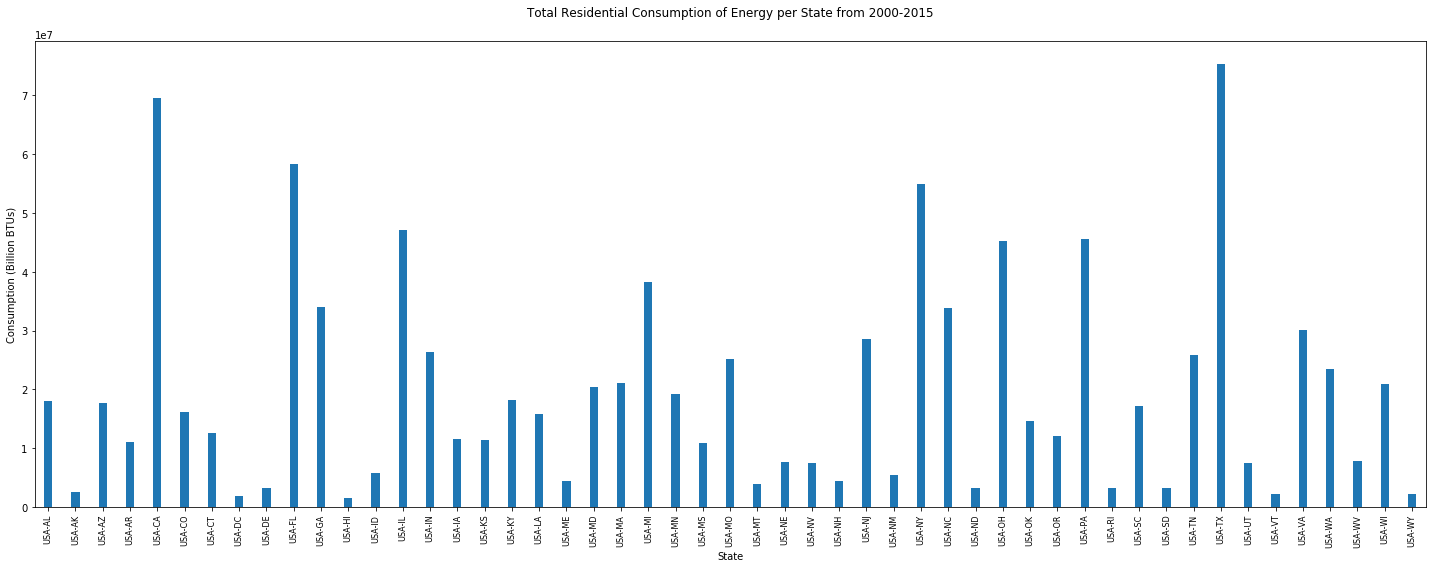

In [52]:
#Create a bar plot to visualize total state consumption throughout the pre-selected time period
#Remove row with USA totals
df1 = res_consumption_df.drop(['USA'])
df1

totals = df1["SubTotal"]
states = df1.index.values
ttl = "Total Residential Consumption of Energy per State from 2000-2015"

x = states
y = totals.values
x_position = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49,50]

plt.figure(figsize=(20,8))
plt.bar(x, y, width=0.3, align="center")
plt.title(ttl, pad=25)
plt.xlabel("State")
plt.ylabel("Consumption (Billion BTUs)")
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', labelsize=8)
plt.xlim(-0.5, (len(x) - 0.5))
plt.tight_layout()
plt.show()